In [3]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pandas.io.data import DataReader

from datetime import datetime

In [4]:
firms = ["GOOG","TSLA","YHOO","FB","AAPL","MSFT","AMZN"]

In [14]:
end = datetime.now()

start = datetime(end.year-3,end.month,end.day)

In [15]:
for each_firm in firms:
    globals()[each_firm] = DataReader(each_firm,"yahoo",start,end)

In [19]:
TSLA.describe()

,Open,High,Low,Close,Volume,Adj Close
count,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000
mean,187.327298,190.681483,183.820265,187.344623,6575785.695364,187.344623
std,67.677493,68.365748,66.821363,67.613704,4932173.668895,67.613704
min,33.080002,33.380001,32.110001,32.910000,440200.000000,32.910000
25%,149.650002,152.839996,146.450005,149.570000,3435550.000000,149.570000
50%,208.570007,212.440002,204.960007,207.830002,5307700.000000,207.830002
75%,236.550003,241.500000,232.214997,237.205001,8234800.000000,237.205001
max,287.670013,291.420013,280.399994,286.040009,37163900.000000,286.040009


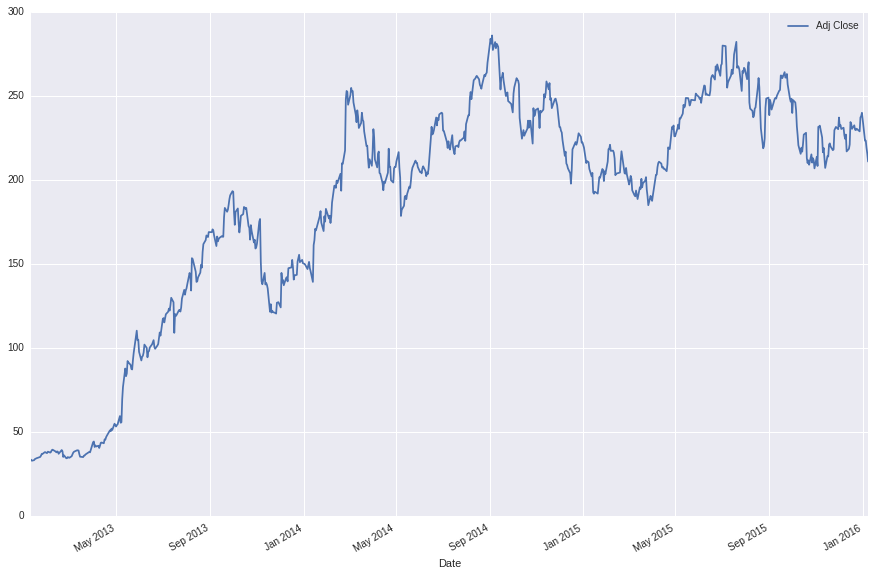

In [21]:
TSLA["Adj Close"].plot(legend = True, figsize = (15,10)) 

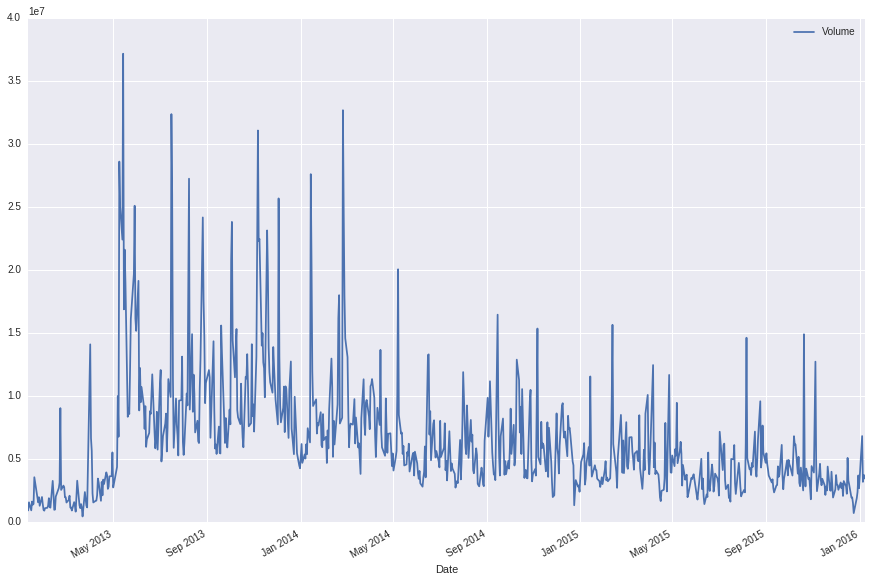

In [23]:
TSLA["Volume"].plot(legend = True, figsize = (15,10))